# Dependency of the Q factor of a Mechanical Resonator on Temperature

Supplementary to "Spin-optomechanical quantum interface enabled by an ultrasmall mechanical and optical mode volume cavity" by H. Raniwala, S. Krastanov, M. Eichenfield, and D. R. Englund, 2022

Can be found at:

- Repository github.com/Krastanov/optomechspin_heralded_entanglement
- Archived together with the publication

This is the material properties datasets and numerical code necessary for deriving the relationship between mechanical Q factor and temperature. Consult the aforementioned publication for more details.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas
import itertools
import scipy
import scipy.interpolate as spint

import numpy as np
from numpy import *

In [2]:
F0 = 5.34e3#/2/pi # 6.5 GHz omega
k_per_h = 20.84e3 # MHz per K
n_per_T = k_per_h/F0 # photons per K
T1a = 3e4 / 190e6 # 1/MHz
g_om0 = 0.316 # MHz
g_sm0 = 41.0 # MHz

Qm = 7.8e7
#Qm = 2.59e9

rho = 3515.0 # kg/m^3
cs = (1.24 + 1.749) / 2 * 1e4 # m/s from "Temperature dependence of the thermal conductivity of different forms of diamond"
gruneisen = 0.65 # from "Temperature dependence of the thermal conductivity of different forms of diamond"

# AKE Mechanical Q factor

In [3]:
# Data taken from the CVD diamond booklet
Temp_to_Cond_CVD =\
"""-202.36406619385343	3466.117216117216
-193.30181245074863	4075.0915750915747
-185.81560283687944	4532.9670329670325
-177.54137115839242	4926.739926739927
-167.29708431836093	5201.465201465201
-156.65878644602049	5311.355311355311
-146.80851063829786	5274.725274725274
-137.74625689519306	5123.626373626374
-124.74389282899921	4803.113553113552
-99.1331757289204	4102.5641025641025
-58.156028368794324	3127.289377289377
13.55397951142632	2147.4358974358975
91.96217494089836	1611.7216117216117
162.88416075650122	1300.3663003663003
229.0780141843972	1098.9010989010987
290.5437352245863	956.9597069597069"""
Temp_to_Kond_CVD = np.array([[float(n) for n in row.split('\t')] for row in Temp_to_Cond_CVD.split('\n')]) + [273, 0]

In [4]:
# Data taken from "Dominance of Intrinsic Phonon Scattering in CVD Diamond"
Temp_to_Cond_Graeb =\
"""4.970826116437392	0.011739804414022356
5.832745346718907	0.0173106539186353
7.196856730011519	0.03233137672355957
9.337660833204565	0.06038581360091904
11.521471145284314	0.09366680383769266
14.94869133709233	0.15942868090023438
20.209499381910778	0.29278205493988263
26.461779584016213	0.46579445813475345
33.71147677550962	0.7861559534230184
42.169650342858226	1.1990209307355282
52.03191873325196	2.0581350899456825
62.18001087320915	3.1126161957508263
74.98942093324558	5.078956799032653
88.39517733744354	7.489056913992514
105.15390294792874	10.586391180292967
121.70753325548924	13.522980152684624
141.5121244290791	16.146038900878473
169.8864456462048	18.325735396934466
201.1738042280793	18.637777974331645
222.44478173594308	18.171678746831123
269.4980055906946	16.146038900878473
310.501349512486	14.590482729396959
356.11256835254994	13.073954406258538
423.62748261855205	11.230845831649233"""
Temp_to_Kond_Graeb = np.array([[float(n) for n in row.split('\t')] for row in Temp_to_Cond_Graeb.split('\n')]) * [1, 100]

In [5]:
# Data taken from "Temperature dependence of the thermal conductivity of different forms of diamond"
Temp_to_Cond_Barm =\
"""5.208051463095659	13.874496932417108
6.120395097052068	22.529085386804176
7.6342833449847936	44.045036729481545
9.689620610699832	90.66649113412795
11.966895123416958	171.85507988274168
15.37845171230607	357.4304018221052
18.52687046637955	611.1027269913906
22.881093568459352	1111.5081564407303
27.979334795798078	1880.8584086810388
34.298609915678014	3182.7281995251874
43.4246664404004	5330.448082988161
53.89745458164338	7647.837187789074
65.74312399140196	9595.837100319803
85.96687653515066	10421.185661505995
111.02462835288112	8835.85540520608
152.94989568341597	6222.328960151767
198.51549801368708	4204.750216147684
233.87141061771467	3249.0628968712745"""
Temp_to_Kond_Barm = np.array([[float(n) for n in row.split('\t')] for row in Temp_to_Cond_Barm.split('\n')])

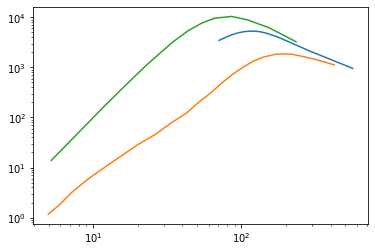

In [6]:
plt.loglog(Temp_to_Kond_CVD[:,0],Temp_to_Kond_CVD[:,1])
plt.loglog(Temp_to_Kond_Graeb[:,0],Temp_to_Kond_Graeb[:,1])
plt.loglog(Temp_to_Kond_Barm[:,0],Temp_to_Kond_Barm[:,1])

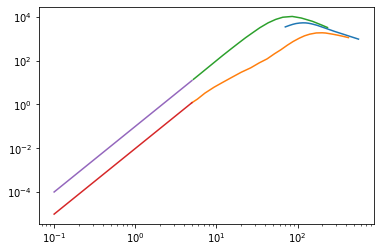

In [7]:
plt.loglog(Temp_to_Kond_CVD[:,0],Temp_to_Kond_CVD[:,1])
plt.loglog(Temp_to_Kond_Graeb[:,0],Temp_to_Kond_Graeb[:,1])
plt.loglog(Temp_to_Kond_Barm[:,0],Temp_to_Kond_Barm[:,1])
T_Graeb, Kond_Graeb = Temp_to_Kond_Graeb[0,0],Temp_to_Kond_Graeb[0,1]
T_Barm, Kond_Barm = Temp_to_Kond_Barm[0,0],Temp_to_Kond_Barm[0,1]
test_t = linspace(0.1,5)
plt.loglog(test_t, Kond_Graeb/T_Graeb**3*test_t**3)
plt.loglog(test_t, Kond_Barm/T_Barm**3*test_t**3)

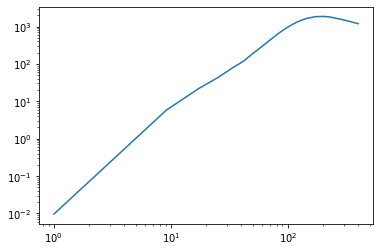

In [8]:
T_to_Kond_Graeb = spint.interp1d(Temp_to_Kond_Graeb[:,0],Temp_to_Kond_Graeb[:,1])
def Kond_AKE(T):
    if T <= T_Graeb:
        return Kond_Graeb/T_Graeb**3*T**3
    else:
        return T_to_Kond_Graeb(T)
Kond_AKE = np.frompyfunc(Kond_AKE,1,1)
test_t = linspace(1,400)
plt.loglog(test_t, Kond_AKE(test_t))

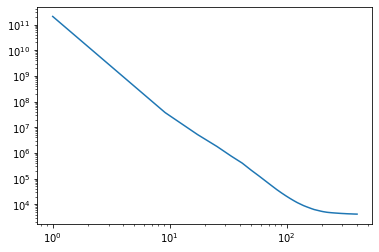

In [9]:
def Q_AKE(T):
    return 1/(4*pi**2*F0*1e6) * rho * cs**4 / T / Kond_AKE(T) / gruneisen**2
test_t = linspace(1,400)
plt.loglog(test_t, Q_AKE(test_t))

# LR mechanical Q factor

In [10]:
cal_in_joule = 0.239

In [11]:
# Data from Thermal  Expansion,  Molar Volume and  Specific  Heat of  Diamond from  0 to 3000K
Temp_to_Cv =\
"""50 3.4161 0.0133 0.0125 
100 3.4161 0.0494 0.0498 
150 3.4162 0.1897 0.2389 
200 3.4163 0.4305 0.5685 
250 3.4166 0.7105 0.9923 
298 3.41706 1.0042 1.4517 
300 3.4171 1.0169 1.4714 
350 3.4177 1.3484 1.9623 
400 3.4184 1.6953 2.4306 
450 3.4194 2.0433 2.8572 
500 3.4205 2.3798 3.2350 
550 3.4218 2.6961 3.5641 
600 3.4233 2.9874 3.8483 
650 3.4249 3.2521 4.0930 
700 3.4266 3.4904 4.3036 
750 3.4285 3.7037 4.4851 
800 3.4304 3.8942 4.6419 
850 3.4325 4.0640 4.7779 
900 3.4346 4.2153 4.8964 
950 3.4368 4.3504 4.9999 
1000 3.4391 4.4710 5.0908 
1100 3.4438 4.6760 5.1710 
1200 3.4488 4.8416 5.3612 
1300 3.4538 4.9768 5.4565 
1400 3.4591 5.0881 5.5340 
1500 3.4644 5.1807 5.5976 
1600 3.4698 5.2584 5.6505 
1800 3.4809 5.3801 5.7323 
2000 3.4923 5.4698 5.7919 
2200 3.5038 5.5376 5.8366 
2400 3.5156 5.5900 5.8709 
2600 3.5274 5.6314 5.8978 
2800 3.5394 5.6645 5.9193 
3000 3.5524 5.6919 5.9294"""
T_mvol_a_Cv = np.array([[float(n) for n in row.strip().split(' ')] for row in Temp_to_Cv.split('\n')])
Tcv = T_mvol_a_Cv[:,0]
Cv = cal_in_joule*T_mvol_a_Cv[:,1]*1e6*T_mvol_a_Cv[:,3]

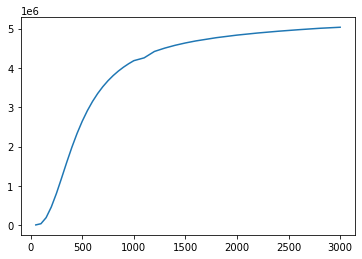

In [12]:
plt.plot(Tcv,Cv)

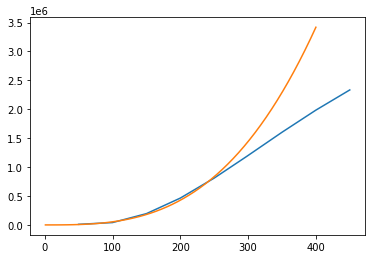

In [13]:
def Cv_debye(T): # Coefficient from " Specific Heats and Enthalpies of Technical Solids at Low Temperatures: A Compilation from the Literature"
    return rho * 0.0152 * 1e-6 * 1e3 * T**3
mask = Tcv < 500
plt.plot(Tcv[mask],Cv[mask])
plt.plot(test_t, Cv_debye(test_t))

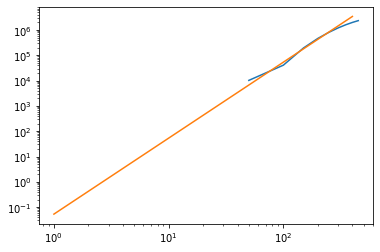

In [14]:
mask = Tcv < 500
plt.loglog(Tcv[mask],Cv[mask])
plt.loglog(test_t, Cv_debye(test_t))

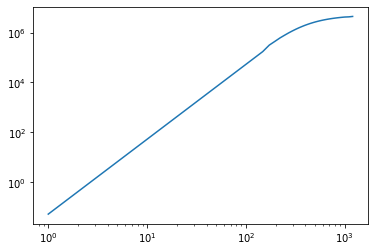

In [15]:
T_Cv_lit = spint.interp1d(Tcv,Cv)
T_Cv_min = Tcv[2]
def T_to_Cv(T):
    if T <= T_Cv_min:
        return Cv_debye(T)
    else:
        return T_Cv_lit(T)
T_to_Cv = np.frompyfunc(T_to_Cv,1,1)
test_t_more = linspace(1,1200)
plt.loglog(test_t_more, T_to_Cv(test_t_more))

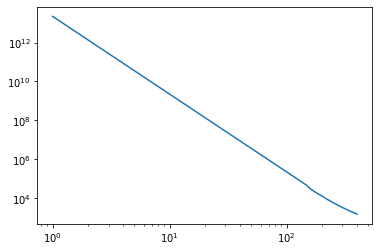

In [16]:
def Q_LR(T):
    return 2/pi * rho * cs**2 / T / T_to_Cv(T) / gruneisen**2
test_t = linspace(1,400)
plt.loglog(test_t, Q_LR(test_t))

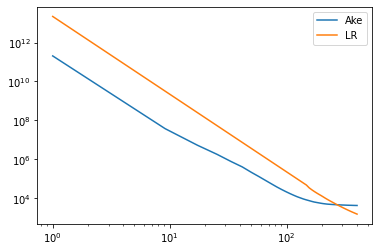

In [17]:
plt.loglog(test_t, Q_AKE(test_t))
plt.loglog(test_t, Q_LR(test_t))
plt.legend(["Ake", "LR"])

# Fonts

In [18]:
#import matplotlib.font_manager as font_manager
#font_manager.findfont('Times New Roman', rebuild_if_missing=True)
#font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
import matplotlib
matplotlib.rcParams['font.family'] =  'Times New Roman'
import matplotlib.pyplot as plt
s = 10
plt.rc('font', size=s) #controls default text size
plt.rc('axes', titlesize=s) #fontsize of the title
plt.rc('axes', labelsize=s) #fontsize of the x and y labels
plt.rc('xtick', labelsize=s) #fontsize of the x tick labels
plt.rc('ytick', labelsize=s) #fontsize of the y tick labels
plt.rc('legend', fontsize=s) #fontsize of the legend

# All together

In [19]:
test_tlog = np.logspace(0,2.5)

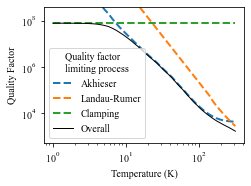

In [20]:
def worstQm(T):
    return 1/(1/Q_AKE(T)+1/Q_LR(T)+1/Qm)
worstQm = np.frompyfunc(worstQm,1,1)
plt.figure(figsize=(3.6,2.5))
plt.loglog(test_tlog, Q_AKE(test_tlog), lw=2, ls="dashed", label="Akhieser")
plt.loglog(test_tlog, Q_LR(test_tlog), lw=2, ls="dashed", label="Landau-Rumer")
plt.loglog(test_tlog, Qm*np.ones_like(test_tlog), lw=2, ls="dashed", label="Clamping")
plt.loglog(test_tlog, worstQm(test_tlog), "k", lw=1, label="Overall")
plt.xlabel("Temperature (K)")
plt.ylabel("Quality Factor")
plt.ylim(None, Qm*5)
plt.legend(title="Quality factor\nlimiting process")
plt.savefig("qfac.png", dpi=600, bbox_inches='tight')

# Photon fidelity and probability

In [21]:
def λₗ(Tₐ, γ, nₜₕ):
    return 0.25*(1/Ta + γ*(nₜₕ+0.5))
def P(T,g,Tₐ,γ,nₜₕ):
    return T/Tₐ * (g/2/λₗ(Tₐ,γ,nₜₕ))**2 * (1+γ*T/4*(3*nₜₕ+1))
def F(T,g,Tₐ,γ,nₜₕ):
    return (1-exp(-C(g,Tₐ,γ,nₜₕ)*T))**2 / (C(g,Tₐ,γ,nₜₕ)*T)**2 / (1+γ*T/4*(3*nₜₕ+1))
def C(g,Tₐ,γ,nₜₕ):
    return 8*g**2 / (1/Tₐ+γ*(nₜₕ+1/2))  +  γ/2*(3*nₜₕ+1)
def Tminapprox(g,Tₐ,γ,nₜₕ):
    return 1/(1/Tₐ+γ*(nₜₕ+1/2))


s = sqrt(10.)
npumps = [10., 10.*s, 100., 100.*s, 1000.]
Temps = [0.15, 4, 10, 40] # K
#Qms = [1e3, s*1e3, 1e4, s*1e4, 1e5, s*1e5, 1e6, s*1e6, 1e7]
#Qms = [1e4, s*1e4, 1e5, s*1e5, 1e6, s*1e6, 1e7]
ts = logspace(1,3,num=10)*T1a

records = []

for npump,Temp,t in itertools.product(npumps, Temps, ts):
    g_om = np.sqrt(npump) * g_om0 # MHz

    nₜ = n_per_T*Temp
    γ = 4*pi*F0/worstQm(Temp) # CHECK THIS

    minT = Tminapprox(g_om,T1a,γ,nₜ) # The minimum t at which the approximation is correct
    if t < minT:
        continue
    p = P(t,g_om,T1a,γ,nₜ)
    inf = 1 - F(t,g_om,T1a,γ,nₜ)
    records.append((npump,Temp,Qm,g_om,nₜ,γ,t,p,inf))

In [22]:
df = pandas.DataFrame(records, columns=['npump','Temp','Qm','g_om','nₜ','γ','t','p','inf'])
df

,npump,Temp,Qm,g_om,nₜ,γ,t,p,inf
0,10.0,0.15,78000000.0,0.999280,0.585393,0.000860,0.001579,9.957945e-07,0.000005
1,10.0,0.15,78000000.0,0.999280,0.585393,0.000860,0.002634,1.661086e-06,0.000008
2,10.0,0.15,78000000.0,0.999280,0.585393,0.000860,0.004394,2.770862e-06,0.000013
3,10.0,0.15,78000000.0,0.999280,0.585393,0.000860,0.007329,4.622085e-06,0.000022
4,10.0,0.15,78000000.0,0.999280,0.585393,0.000860,0.012225,7.710124e-06,0.000037
...,...,...,...,...,...,...,...,...,...
195,1000.0,40.00,78000000.0,9.992797,156.104869,0.157657,0.020393,1.757537e-03,0.642829
196,1000.0,40.00,78000000.0,9.992797,156.104869,0.157657,0.034017,3.468236e-03,0.802045
197,1000.0,40.00,78000000.0,9.992797,156.104869,0.157657,0.056744,7.278175e-03,0.915170
198,1000.0,40.00,78000000.0,9.992797,156.104869,0.157657,0.094655,1.629456e-02,0.972284


In [23]:
df['rate'] = df['p']/df['t']*1e6

In [24]:
def man_exp(n,decimals=1):
    exp = floor(log10(n))
    man = int(n/10**(exp-decimals))/10**decimals
    return '$%.1f\\times 10^{%d}$'%(man, exp)

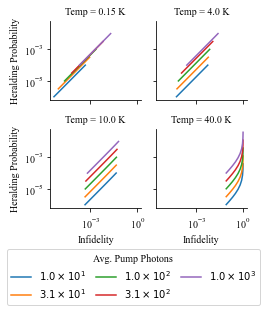

In [25]:
fg = sns.FacetGrid(df, col='Temp', hue='npump', col_wrap=2, height=3.6/2)
fg.map(plt.loglog,'inf','p')
fg.set(xscale='log',yscale='log',xlabel='Infidelity',ylabel='Heralding Probability')
fg.set_titles(col_template="Temp = {col_name} K")
fg.axes[2].legend(labels=[man_exp(n) for n in npumps],title='Avg. Pump Photons',
                  bbox_to_anchor=(-0.52,-0.45), loc="upper left", ncol=3, handletextpad=0.8, columnspacing=1)
plt.savefig("prob_fid_multipleT.png", dpi=600, bbox_inches='tight')

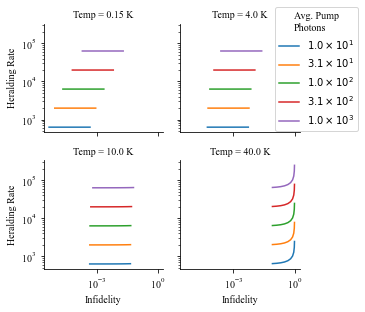

In [26]:
fg = sns.FacetGrid(df, col='Temp', hue='npump', col_wrap=2, height=2.2)
fg.map(plt.loglog,'inf','rate')
fg.set(xscale='log',yscale='log',xlabel='Infidelity',ylabel='Heralding Rate')
fg.set_titles(col_template="Temp = {col_name} K")
fg.axes[1].legend(labels=[man_exp(n) for n in npumps],title='Avg. Pump\nPhotons',bbox_to_anchor=(0.75,1.2), loc="upper left")
plt.savefig("rate_fid_multipleT.png", dpi=500, bbox_inches='tight')

In [27]:
df[(df['Temp']==40) & (df['npump']==1000)]

,npump,Temp,Qm,g_om,nₜ,γ,t,p,inf,rate
190,1000.0,40.0,78000000.0,9.992797,156.104869,0.157657,0.001579,0.000102,0.083427,64405.793752
191,1000.0,40.0,78000000.0,9.992797,156.104869,0.157657,0.002634,0.000173,0.134583,65626.884137
192,1000.0,40.0,78000000.0,9.992797,156.104869,0.157657,0.004394,0.000297,0.212594,67663.785665
193,1000.0,40.0,78000000.0,9.992797,156.104869,0.157657,0.007329,0.000521,0.324985,71061.542199
194,1000.0,40.0,78000000.0,9.992797,156.104869,0.157657,0.012225,0.000938,0.472996,76729.341698
195,1000.0,40.0,78000000.0,9.992797,156.104869,0.157657,0.020393,0.001758,0.642829,86183.801087
196,1000.0,40.0,78000000.0,9.992797,156.104869,0.157657,0.034017,0.003468,0.802045,101954.789872
197,1000.0,40.0,78000000.0,9.992797,156.104869,0.157657,0.056744,0.007278,0.915170,128262.384737
198,1000.0,40.0,78000000.0,9.992797,156.104869,0.157657,0.094655,0.016295,0.972284,172146.097864
199,1000.0,40.0,78000000.0,9.992797,156.104869,0.157657,0.157895,0.038739,0.992618,245348.543305
